# Lecture 17: Mutlivariate Data Analysis in R

```{note}
In the first few lectures of this course, we explored measures of location, dispersion, and shape to communicate the characteristics of the single variable data. In this lecture, we will explore means of communicating characteristics of multivariate data using ITUS houshold data, examining relation between monthly expenditure per capita and socio-demographic as well as socio-economic variables.
```

In [11]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
options(repr.plot.width = 12, repr.plot.height = 8)

In [12]:
# 2024 ITUS Household Data (processed)
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS_HHD_DT.csv"
data <- read.csv(url)                           # Loading Data
str(data)                                       # Data Structure

'data.frame':	139487 obs. of  21 variables:
 $ Unique_HH_ID       : chr  "2024-30010-1-241-17-13-11-2-2420-4-1" "2024-30010-1-241-17-13-11-2-2420-4-2" "2024-30010-1-241-17-13-11-2-2420-4-3" "2024-30010-1-241-17-13-11-2-2420-4-4" ...
 $ time_of_year       : int  2 2 2 2 2 2 2 2 2 2 ...
 $ day_of_week        : int  2 3 7 7 4 6 4 1 5 2 ...
 $ sector             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ region             : int  2 2 2 2 2 2 2 2 2 2 ...
 $ district_population: int  1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 ...
 $ gender_ratio       : num  0 0.5 0.4 0.556 0.5 0.5 0.5 0.429 0.5 0.333 ...
 $ average_age        : num  45 34.5 29.2 15 21.8 65.5 20.2 26 62.5 19.3 ...
 $ marital_status     : int  1 2 2 2 2 2 2 2 2 2 ...
 $ highest_eduLevel   : int  11 11 5 4 3 11 4 11 4 5 ...
 $ employment_ratio   : num  1 0.25 0.4 0.222 0.333 0 0.333 0.286 0.5 0.333 ...
 $ family_structure   : num  0 0.25 0.4 0.778 0.5 0 0.667 0.286 0 0.333 ...
 $ household_size     

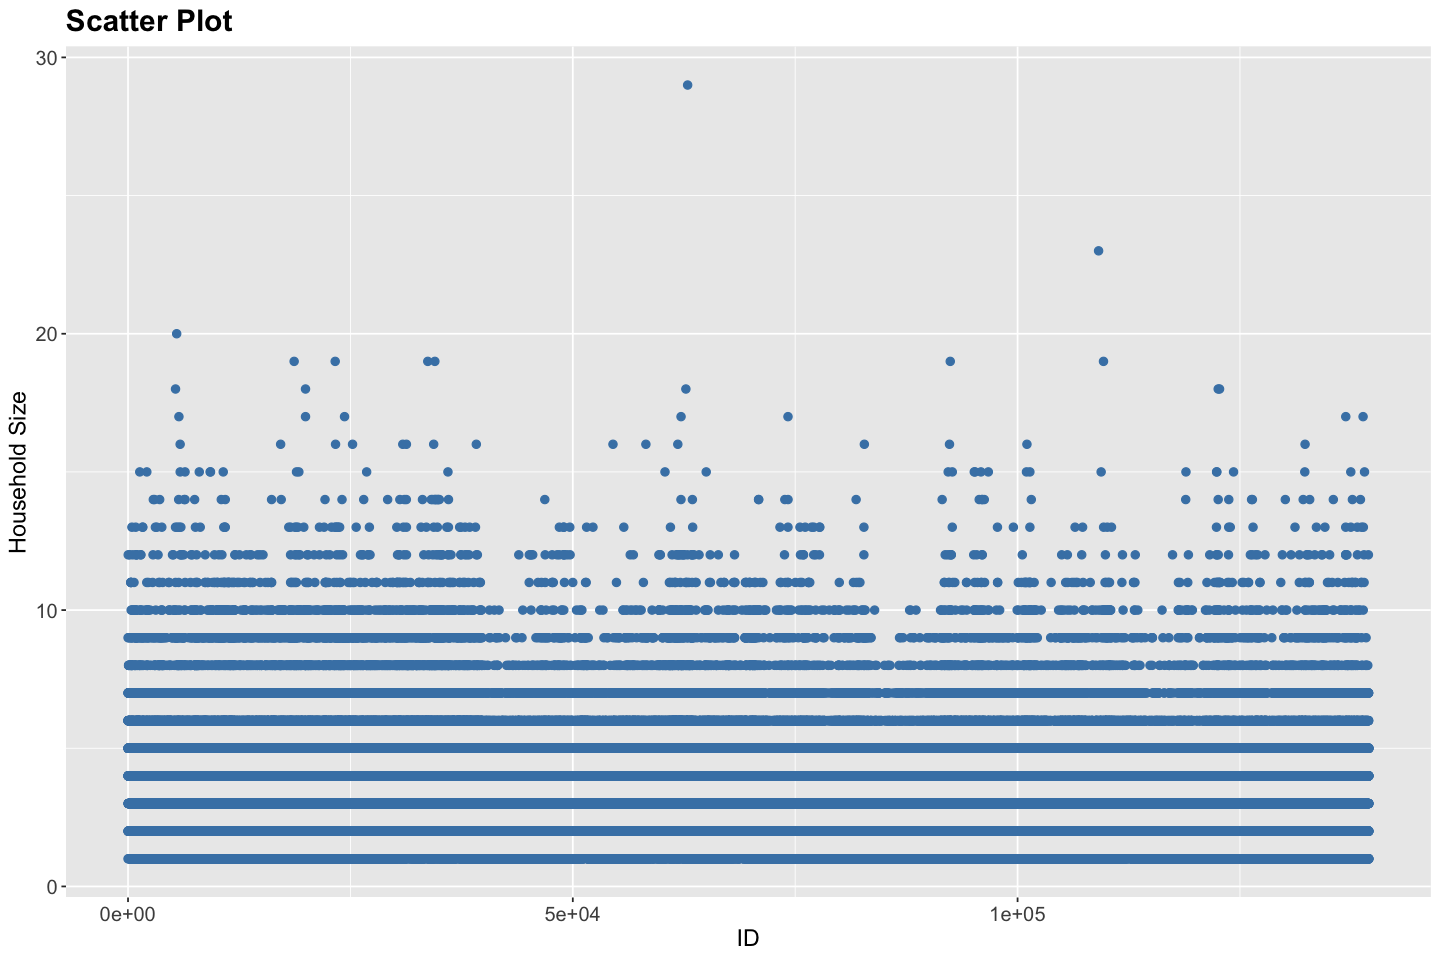

In [13]:
# Scatter Plot for Household Size
ggplot(data, aes(x = seq_along(Unique_HH_ID), y = household_size)) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "ID",
    y = "Household Size",
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

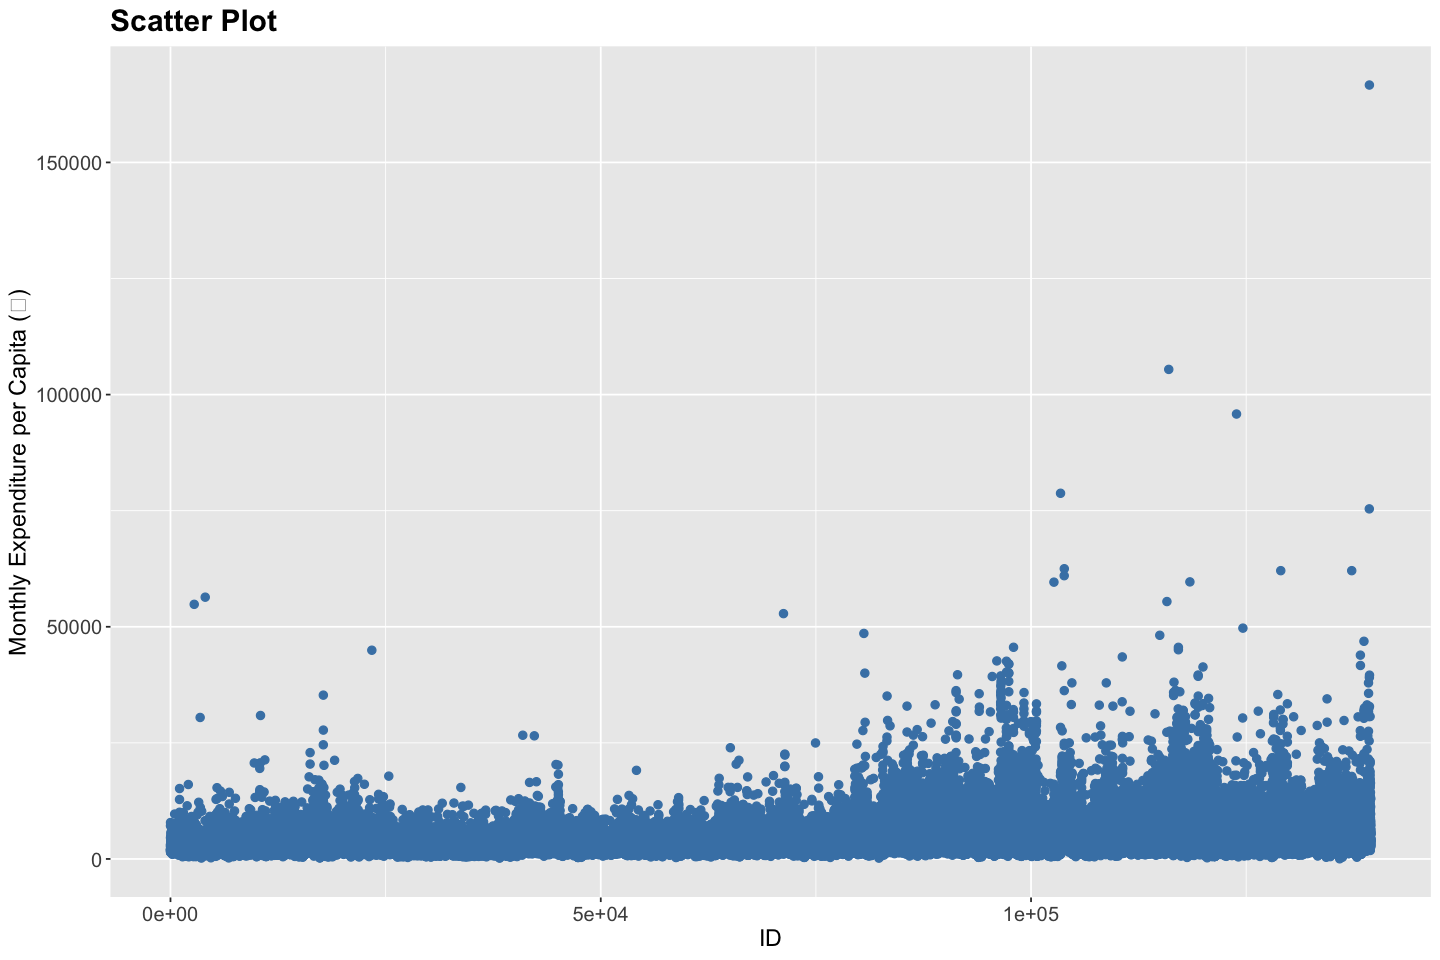

In [15]:
# Scatter Plot for Monthly Expenditure per Capita (₹)
ggplot(data, aes(x = seq_along(Unique_HH_ID), y = total_expenditure / household_size)) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "ID",
    y = "Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

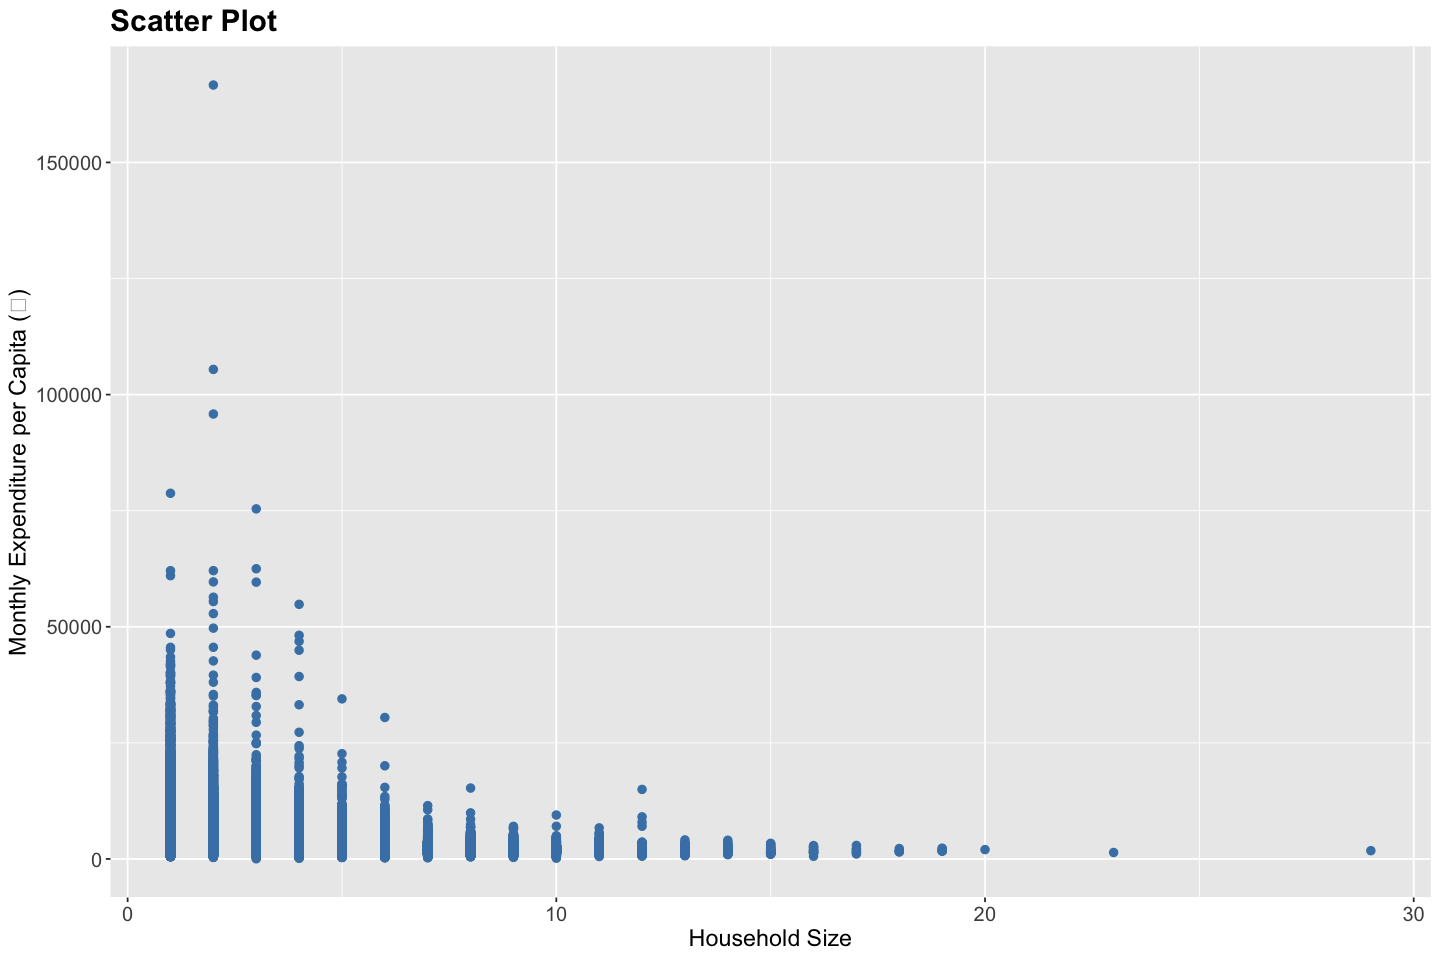

In [16]:
# Scatter plot for Monthly Expenditure per Capita vs. Household Size
ggplot(data, aes(x = household_size, y = total_expenditure / household_size)) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "Household Size",
    y = "Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

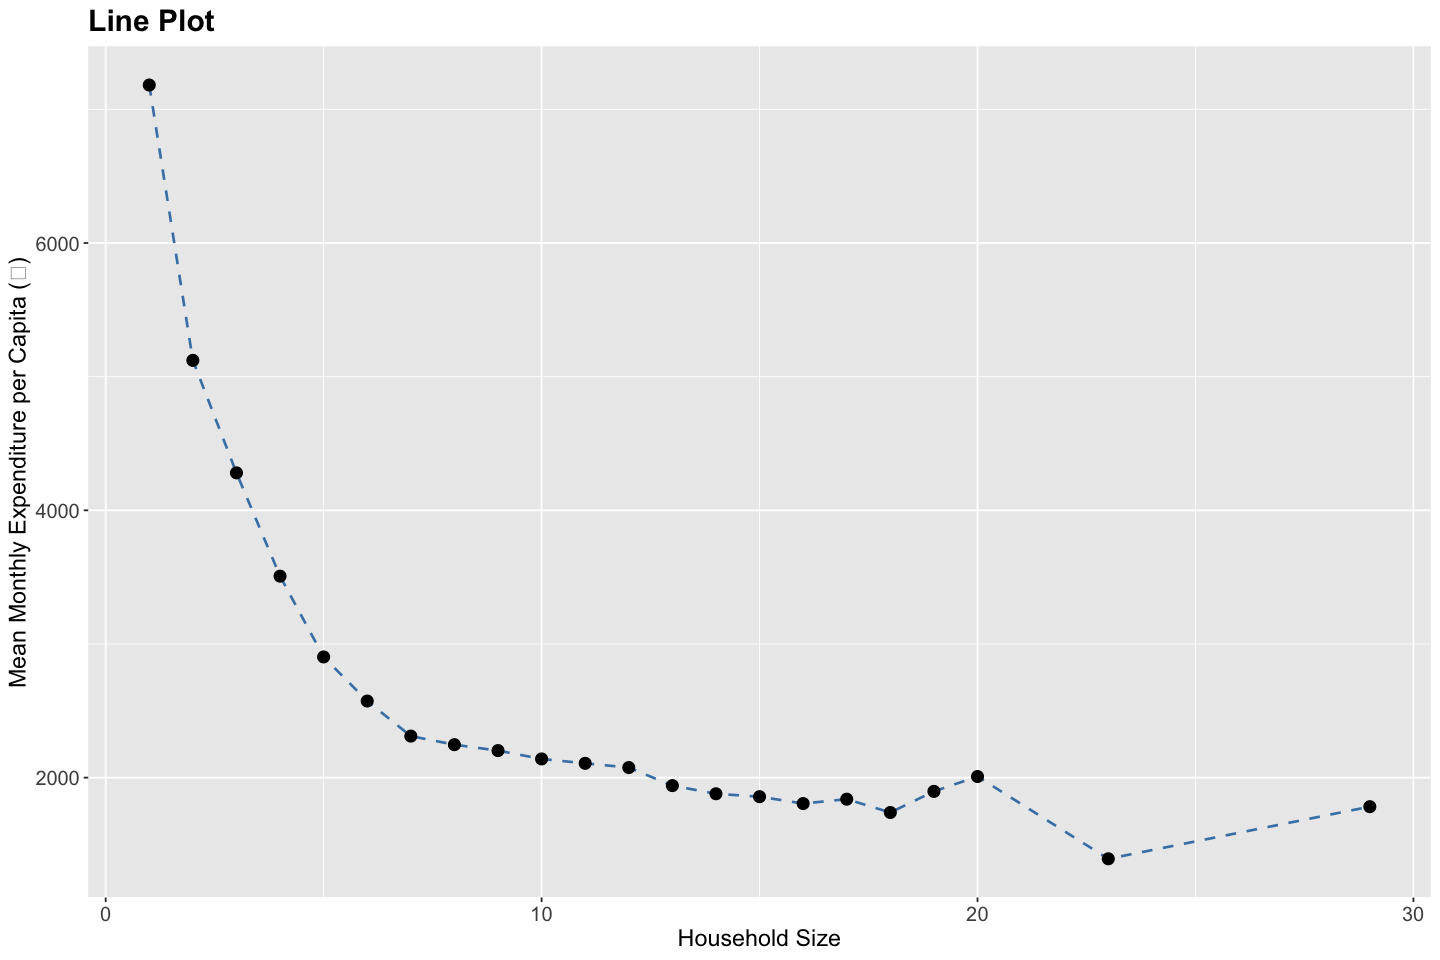

In [18]:
# Prepare data for mean monthly expenditure per capita by household size
df <- data %>%
  group_by(household_size) %>%
  summarise(mean_expenditure = mean(total_expenditure / household_size, na.rm = TRUE))

# Create a line plot
ggplot(df, aes(x = household_size, y = mean_expenditure)) +
  geom_line(color = "steelblue", linewidth = 0.75, linetype = "dashed") +
  geom_point(color = "black", size = 3) +
  labs(
    title = "Line Plot",
    x = "Household Size",
    y = "Mean Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

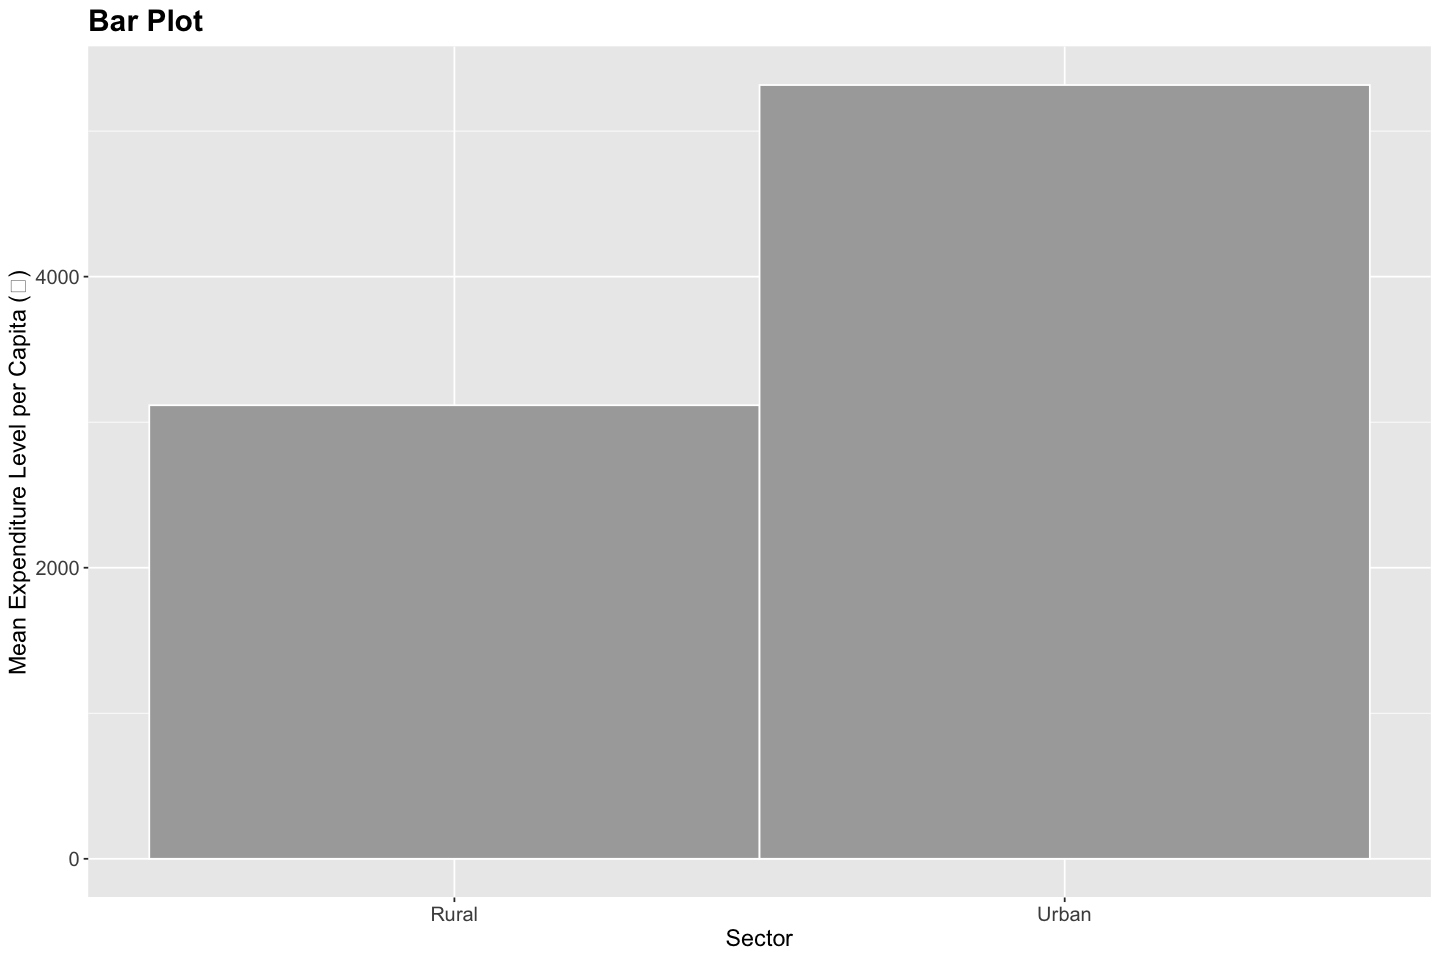

In [29]:
# Prepare data for mean monthly expenditure per capita by sector
df <- data %>%
  mutate(sector = recode(factor(sector), `1` = "Rural", `2` = "Urban")) %>%
  group_by(sector) %>%
  summarise(mean_expenditure = mean(total_expenditure / household_size, na.rm = TRUE))
  
# Create a bar plot
ggplot(df, aes(x = sector, y = mean_expenditure, fill = sector)) +
  geom_bar(stat = "identity", width = 1, color = "white", fill = "darkgray") + 
  labs(
    title = "Bar Plot",
    x = "Sector",
    y = "Mean Expenditure Level per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "none"
  )

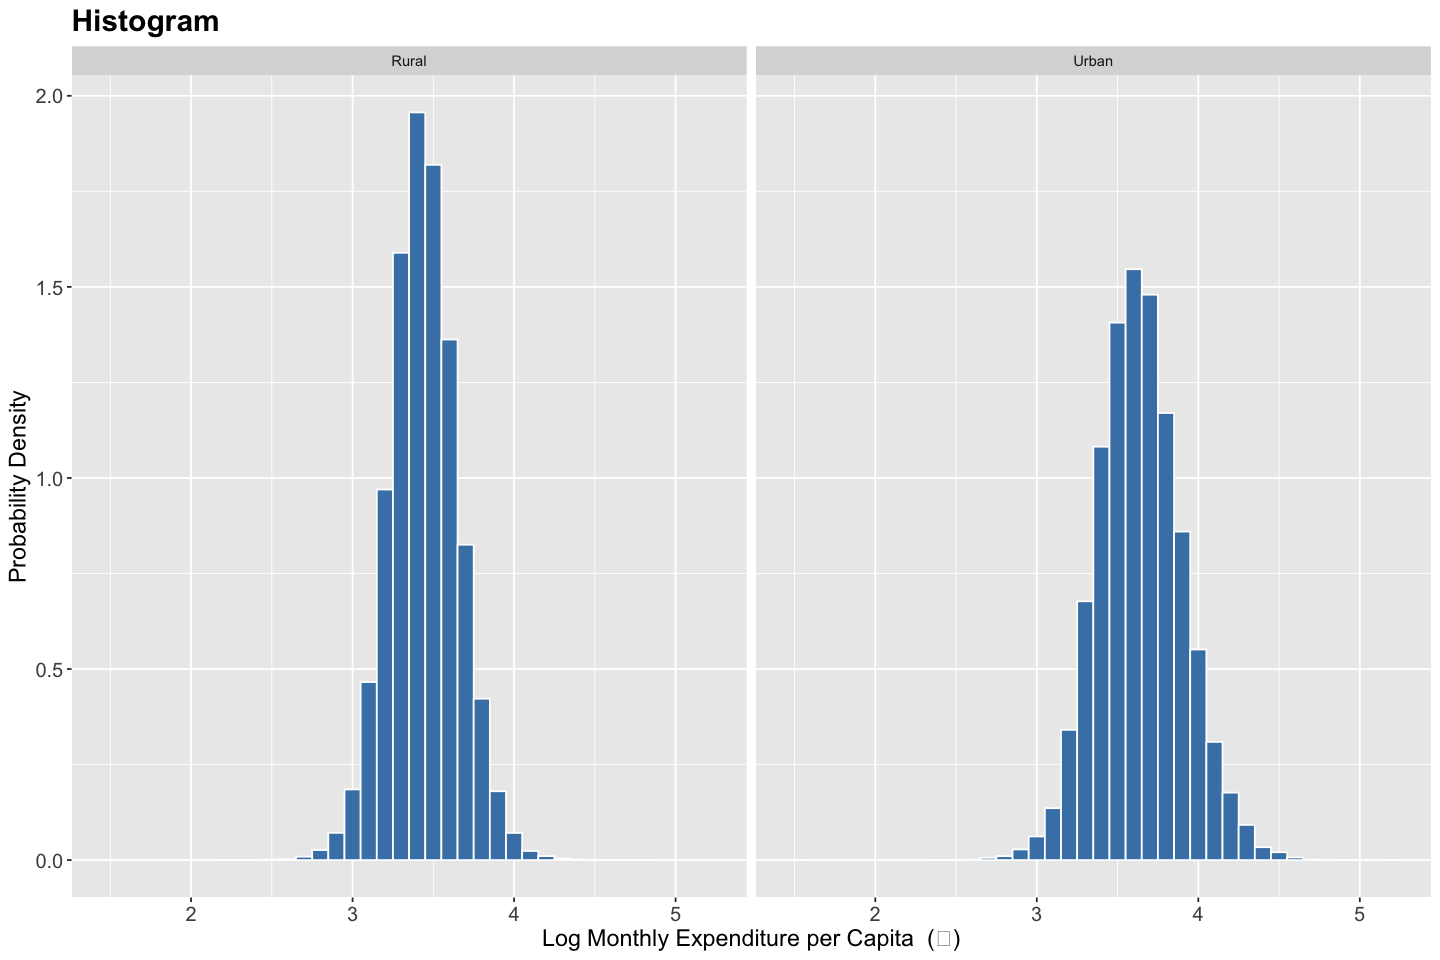

In [20]:
# Create histogram
ggplot(data, aes(x = log10(total_expenditure / household_size), y = ..density..)) +
  geom_histogram(binwidth = 0.1, fill = "steelblue", color = "white") +
  facet_wrap(~ recode(factor(sector), `1` = "Rural", `2` = "Urban")) +
  labs(
    title = "Histogram",
    x = "Log Monthly Expenditure per Capita  (₹)",
    y = "Probability Density"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

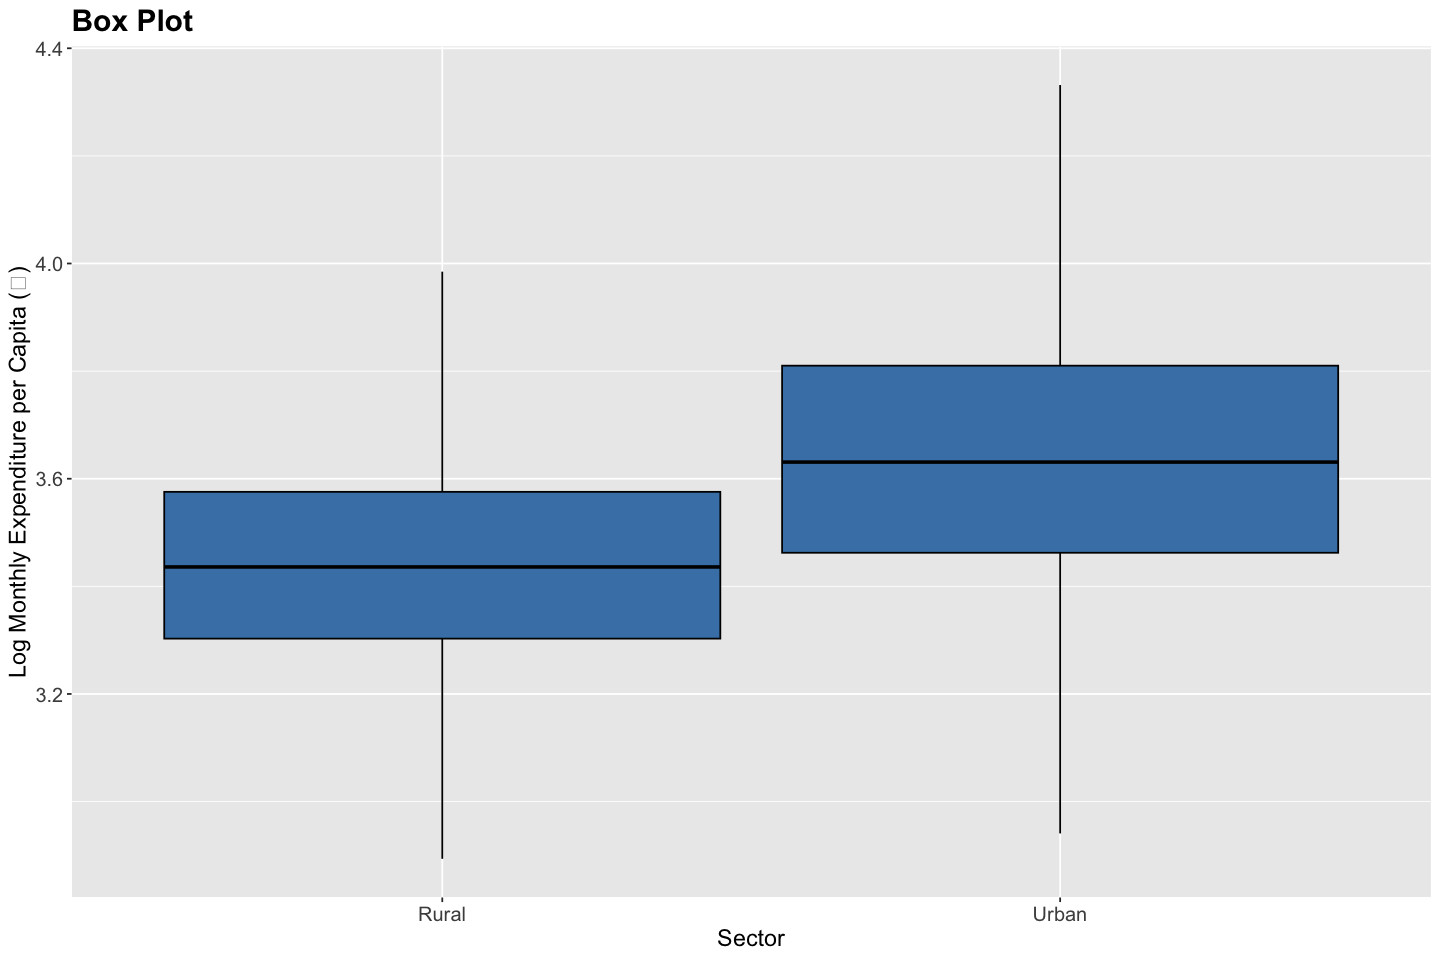

In [21]:
# Compute boxplot stats (min, Q1, median, Q3, max)
df <- data %>%
  group_by(sector) %>%
  summarise(
    min = quantile(log10(total_expenditure / household_size), 0.25, na.rm = TRUE) - 1.5 * (quantile(log10(total_expenditure / household_size), 0.75, na.rm = TRUE) - quantile(log10(total_expenditure / household_size), 0.25, na.rm = TRUE)),
    lower = quantile(log10(total_expenditure / household_size), 0.25, na.rm = TRUE),
    middle = median(log10(total_expenditure / household_size), na.rm = TRUE),
    upper = quantile(log10(total_expenditure / household_size), 0.75, na.rm = TRUE),
    max = quantile(log10(total_expenditure / household_size), 0.75, na.rm = TRUE) + 1.5 * (quantile(log10(total_expenditure / household_size), 0.75, na.rm = TRUE) - quantile(log10(total_expenditure / household_size), 0.25, na.rm = TRUE))
  )

# Create box plot
ggplot(df, aes(x = recode(factor(sector), `1` = "Rural", `2` = "Urban"))) +
  geom_boxplot(
    aes(
      min = min,
      lower = lower,
      middle = middle,
      upper = upper,
      max = max
    ),
    stat = "identity",
    fill = "steelblue",
    color = "black"
  ) +
  labs(
    title = "Box Plot",
    x = "Sector",
    y = "Log Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )